# 04 DESCRIPTIVE STATISTICS
- Author: john fredy beltran cuellar
- Date: 11/08/2025
- Goal: Learn basic EDA (Exploratory Data Analysis) using descriptive statistics. 

In [ ]:
# Step 0: Load libraries and custom modules
import pandas as pd  # Librería para manejo y análisis de datos en forma de tablas (DataFrames)
import numpy as np # Librería para cálculos numéricos y manejo eficiente de arreglos y matrices
import matplotlib.pyplot as plt  # Módulo de Matplotlib para crear gráficos estáticos en 2D
import seaborn as sns # Librería para visualización estadística basada en Matplotlib, con gráficos más atractivos
import plotly.express as px # Librería para crear gráficos interactivos de forma sencilla

# Credits:
- Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer,
- Archipelago (Antarctica) penguin data. R package version 0.1.0.,
- https://allisonhorst.github.io/palmerpenguins/

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

In [ ]:
# Step 1: Load data
url = 'https://gist.githubusercontent.com/slopp/' # Dirección web (URL) donde se encuentra el recurso o archivo de datos
url += 'ce3b90b9168f2f921784de84fa445651/raw/' 
url += '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'

df_raw = pd.read_csv(url)  # Lee el archivo CSV desde la URL y lo guarda como DataFrame en la variable df_raw
df_raw.sample(10)  # Muestra 10 filas aleatorias del DataFrame

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
95,96,Adelie,Dream,40.8,18.9,208.0,4300.0,male,2008
314,315,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
96,97,Adelie,Dream,38.1,18.6,190.0,3700.0,female,2008
127,128,Adelie,Torgersen,41.5,18.3,195.0,4300.0,male,2009
156,157,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007
203,204,Gentoo,Biscoe,48.5,14.1,220.0,5300.0,male,2008
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
226,227,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,female,2008
227,228,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,male,2008


In [ ]:
df_raw.info()# me muestra la informacion de los datos para saber en que tipo de dato esta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
# Step 2: Data preprocessing
df_baking = df_raw.copy() # Crear una copia del DataFrame original para no modificarlo directamente
df_baking = df_baking.drop(columns=['rowid']) # Eliminar la columna 'rowid' ya que probablemente no aporta información útil
df_baking = df_baking.dropna()# Eliminar filas con valores faltantes para limpiar el dataset
df_baking['species'] = df_baking['species'].astype('category') # Convertir la columna 'species' a tipo categórico (útil para análisis y memoria)
df_baking['island'] = df_baking['island'].astype('category')# Convertir la columna 'island' a tipo categórico
df_baking['sex'] = df_baking['sex'].astype('category') # Convertir la columna 'sex' a tipo categórico

df = df_baking.copy()# Crear una copia final del DataFrame ya limpio y transformado
df.info()# Mostrar información general del DataFrame: columnas, tipos de datos, memoria usada y valores no nulos

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
 7   year               333 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 17.0 KB


In [ ]:
# step 3: EDA (Exploratory Data Analysis)
df.describe().T # Mostrar estadísticas descriptivas de todas las columnas numéricas y transponer para mejor lectura


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0
year,333.0,2008.042042,0.812944,2007.0,2007.0,2008.0,2009.0,2009.0


In [ ]:
df[df["species"] == "Adelie"].describe().T # Filtrar el DataFrame para incluir solo las filas donde 'species' es "Adelie" 
# y mostrar estadísticas descriptivas de sus columnas numéricas, transponiendo el resultado para mejor lectura



,count,mean,std,min,25%,50%,75%,max
bill_length_mm,146.0,38.823973,2.662597,32.1,36.725,38.85,40.775,46.0
bill_depth_mm,146.0,18.347260,1.219338,15.5,17.500,18.40,19.000,21.5
flipper_length_mm,146.0,190.102740,6.521825,172.0,186.000,190.00,195.000,210.0
body_mass_g,146.0,3706.164384,458.620135,2850.0,3362.500,3700.00,4000.000,4775.0
year,146.0,2008.054795,0.811816,2007.0,2007.000,2008.00,2009.000,2009.0


In [ ]:
df.describe(include="category").T # Mostrar estadísticas descriptivas de las columnas categóricas del DataFrame 
# (como conteo, categorías únicas, valor más frecuente y su frecuencia), 
# transponiendo el resultado para una mejor visualización


,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,male,168


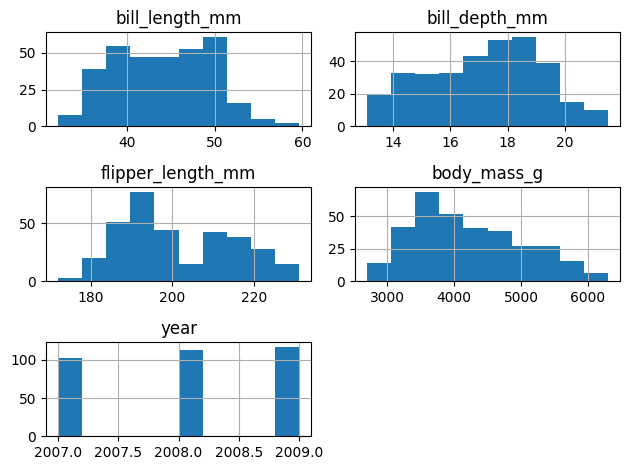

In [ ]:
df.hist() # Crear histogramas de todas las columnas numéricas del DataFrame
plt.tight_layout() # Ajustar automáticamente el espaciado entre subgráficos para que no se sobrepongan
plt.show() # Mostrar todos los gráficos generados


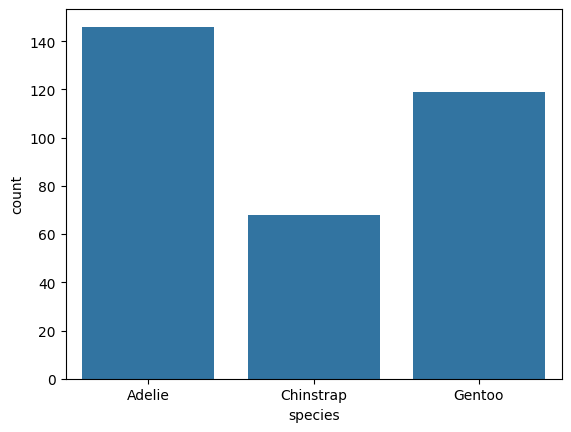

In [ ]:
sns.countplot(data=df, x="species") # Crear un gráfico de barras que muestre la cantidad de registros por cada categoría de la columna 'species'
plt.show()


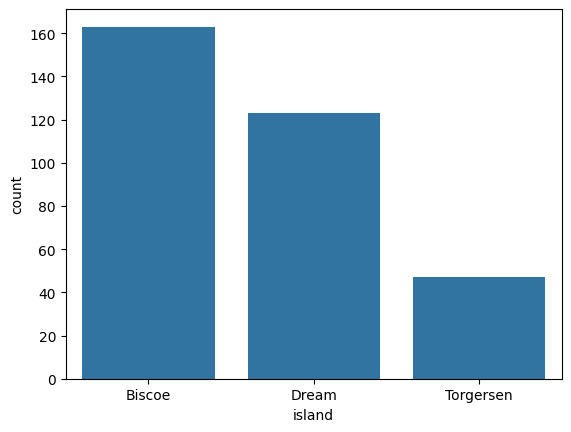

In [ ]:
sns.countplot(data=df, x="island") # Crear un gráfico de barras que muestre la cantidad de registros por cada categoría de la columna 'island'
plt.show()


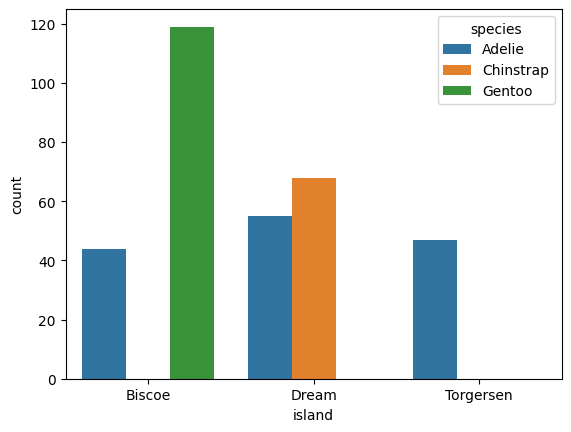

In [ ]:
sns.countplot(data=df, x="island", hue="species") # Crear un gráfico de barras apiladas por colores que muestre la cantidad de registros por cada isla ('island')
# y diferenciar cada barra según la especie ('species') usando el parámetro hue
plt.show()


In [ ]:
df[["species", "island"]].value_counts() # Contar la cantidad de ocurrencias de cada combinación única de 'species' e 'island' 
# y mostrar el resultado como un Series ordenada por frecuencia


species    island   
Gentoo     Biscoe       119
Chinstrap  Dream         68
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Name: count, dtype: int64

In [ ]:
# Crear un gráfico de barras interactivo con Plotly Express que muestre:
# - en el eje x: las especies ('species')
# - en el eje y: la cantidad de registros ('count') de cada combinación especie-isla
# - con barras coloreadas según la isla ('island')
# - y con un título "especies por isla"

fig = px.bar(data_frame=df[["species", "island"]].value_counts().reset_index(), x="species", y="count", color="island", title="especies por isla")
fig.show()

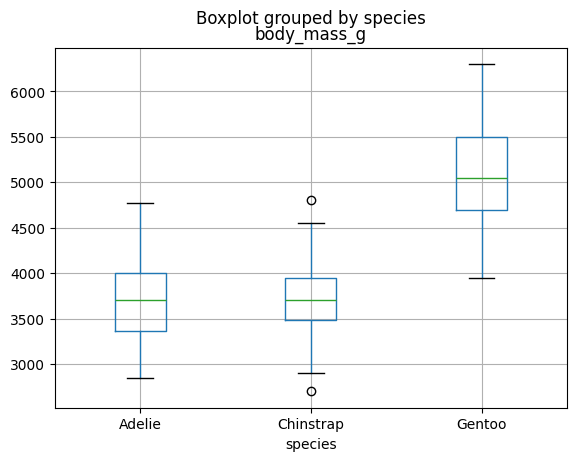

In [ ]:
# Crear un diagrama de caja (boxplot) de la columna 'body_mass_g' para cada especie ('species')
# Esto permite visualizar la mediana, cuartiles y posibles valores atípicos por especie
df.boxplot(column="body_mass_g", by="species")
plt.show()


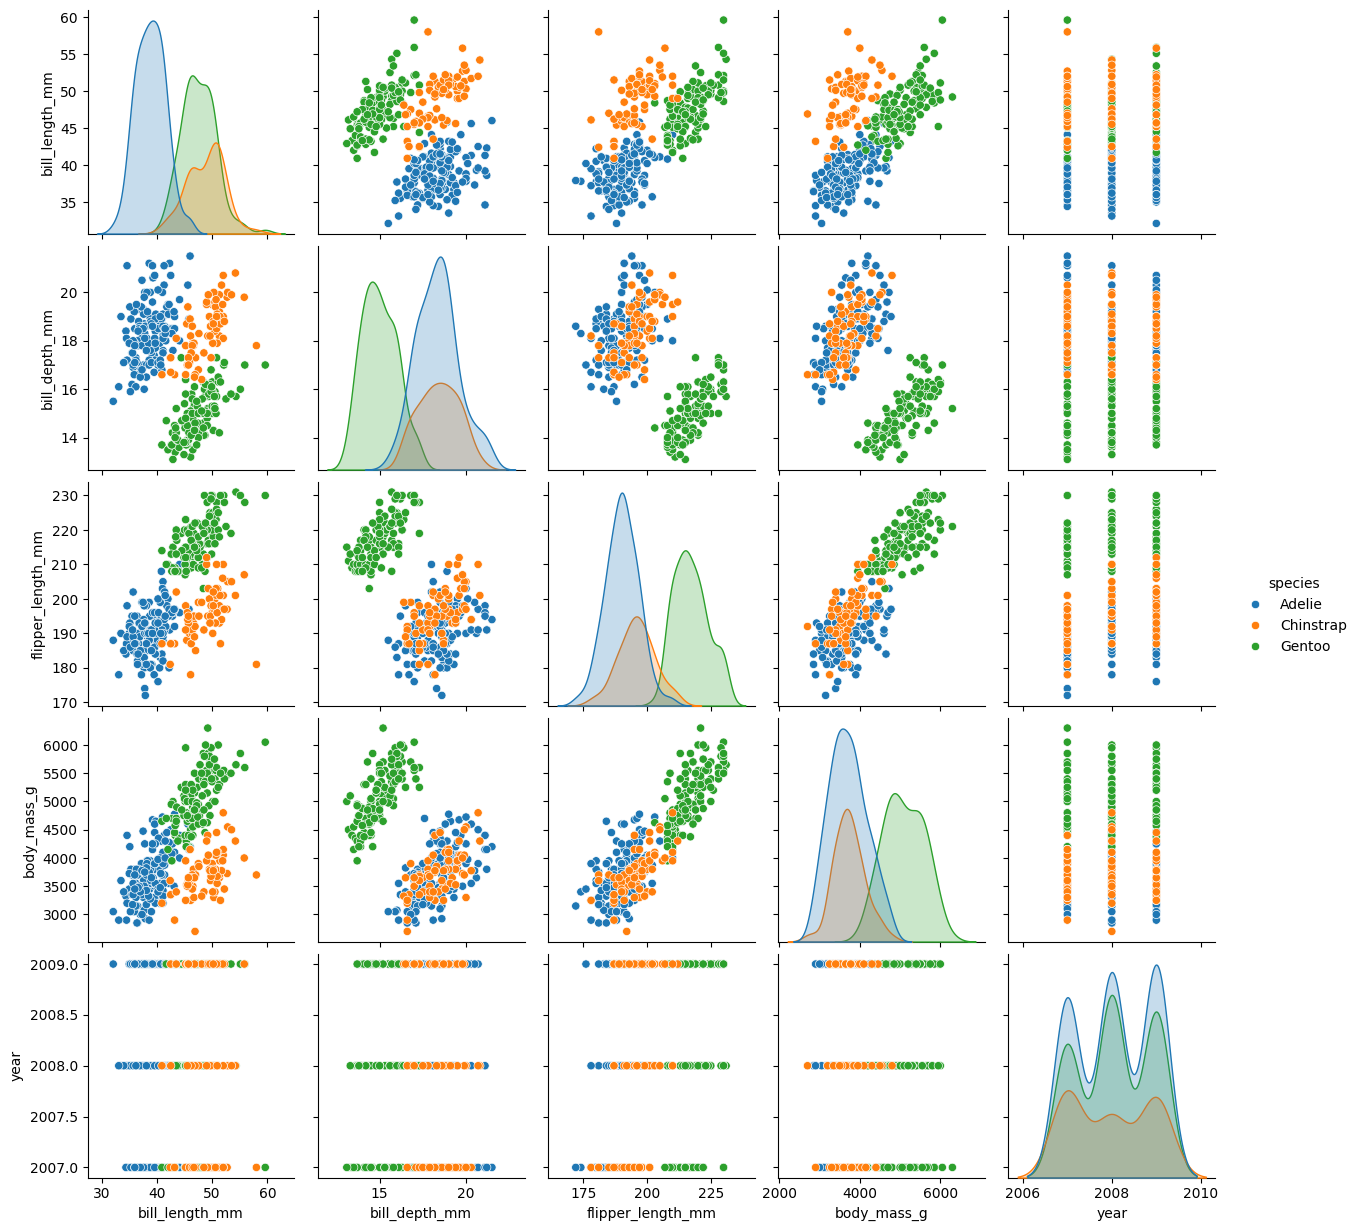

In [ ]:
# analysis bivariado
# Crear un gráfico de pares (pairplot) de todas las columnas numéricas del DataFrame
# Cada punto se colorea según la especie ('species') para facilitar la comparación entre variables
sns.pairplot(data=df, hue="species") 
plt.show()


In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame
# Eliminar la columna 'year' porque probablemente no se quiere incluir en la correlación
# Calcular la matriz de correlación entre las columnas numéricas restantes
df.select_dtypes("number").drop(columns="year").corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [ ]:
# Crear una matriz de gráficos de dispersión interactiva con Plotly Express
# - 'dimensions': las columnas numéricas a comparar entre sí
# - 'color': colorear los puntos según la especie ('species')
# Esto permite visualizar relaciones y patrones entre las variables para cada especie
fig = px.scatter_matrix(df,dimensions=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'],color='species')
fig.show()

## Descriptive Statistics with timelines

In [ ]:
# step 0 import libraries and custom modules
import pandas as pd # Importar la librería pandas para manipulación y análisis de datos
import numpy as np # Importar la librería numpy para operaciones numéricas y manejo de arreglos
import matplotlib.pyplot as plt # Importar matplotlib.pyplot para crear gráficos y visualizaciones
import seaborn as sns # Importar seaborn para visualizaciones estadísticas más atractivas y fáciles de usar

In [36]:
# step load data 
url = 'https://github.com/datagy/mediumdata/raw/master/sample_pivot.xlsx'
df_raw = pd.read_excel(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


In [ ]:
# Mostrar una muestra aleatoria de 10 filas del DataFrame original df_raw
# Esto permite inspeccionar rápidamente algunos registros sin mostrar todo el dataset
df_raw.sample(10)

,Date,Region,Type,Units,Sales
25,2020-05-23,North,Men's Clothing,NaN,240
792,2020-03-20,East,Women's Clothing,35.0,288
728,2020-12-27,West,Women's Clothing,7.0,400
19,2020-03-08,North,Men's Clothing,NaN,644
976,2020-01-17,North,Children's Clothing,25.0,825
520,2020-12-08,East,Women's Clothing,19.0,513
870,2020-11-20,North,Women's Clothing,31.0,360
766,2020-04-07,East,Women's Clothing,24.0,448
131,2020-11-28,North,Women's Clothing,29.0,580
833,2020-01-02,East,Women's Clothing,9.0,374


In [ ]:
# step 2: data preprocesing
df_baking = df_raw.copy()
df_baking["Region"] = df_baking["Region"].astype("category")# cambia el tipo de dato del nombre a categoria
df_baking["Type"] = df_baking["Type"].astype("category") #cambia a categoria por que tiene datos repetitivos
df_baking["Units"] = df_baking["Units"].astype("int",errors="ignore")# cambia el float 64 a int entero
df_baking["Sales"] = df_baking["Sales"].astype("float") # cambia de entero a flotante por que las ventas contienen decimales
df_baking.columns= df_baking.columns.str.lower() # Sirve para cambiar el nombre de las columnas de mayusculas a minusculas
df_baking = df_baking.set_index("date") # Establecer la columna 'date' como índice del DataFrame df_baking
# Esto es útil para análisis basados en tiempo o series temporales 
df = df_baking # Asignar el DataFrame df_baking a la variable df
# Esto permite trabajar con df como la versión limpia y procesada del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2020-07-11 to 2020-08-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   region  1000 non-null   category
 1   type    1000 non-null   category
 2   units   911 non-null    float64 
 3   sales   1000 non-null   float64 
dtypes: category(2), float64(2)
memory usage: 25.7 KB


In [ ]:
# step 3 EDA
display(df.describe(include="number").T) # me trae estadisticas descriptivas de las variables numericas
display(df.describe(include="category").T) # me trae el analisis de categorias

,count,mean,std,min,25%,50%,75%,max
units,911.0,19.638858,9.471309,3.0,12.0,20.0,28.0,35.0
sales,1000.0,427.254000,253.441362,33.0,224.0,380.0,575.0,1155.0


,count,unique,top,freq
region,1000,4,East,411
type,1000,3,Women's Clothing,424


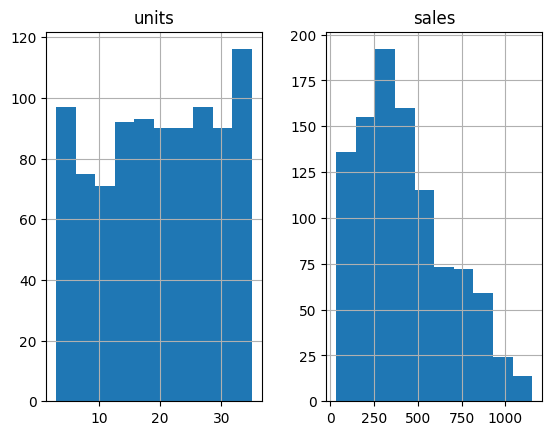

In [ ]:
df.select_dtypes("number").hist()  Seleccionar solo las columnas numéricas del DataFrame
# y crear histogramas para cada una para visualizar la distribución de sus valores
plt.show()

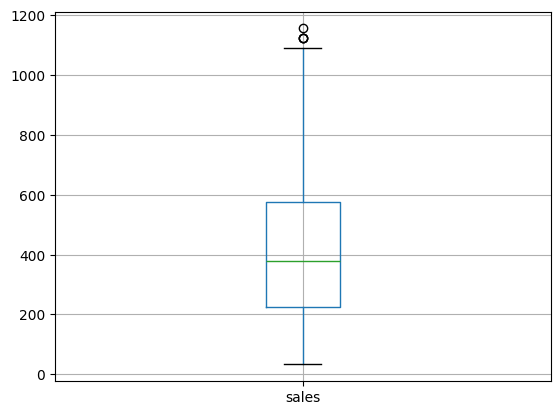

In [ ]:
df[["sales"]].boxplot() # Crear un diagrama de caja (boxplot) de la columna 'sales'
# Esto permite visualizar la mediana, cuartiles y posibles valores atípicos de las ventas
plt.show()


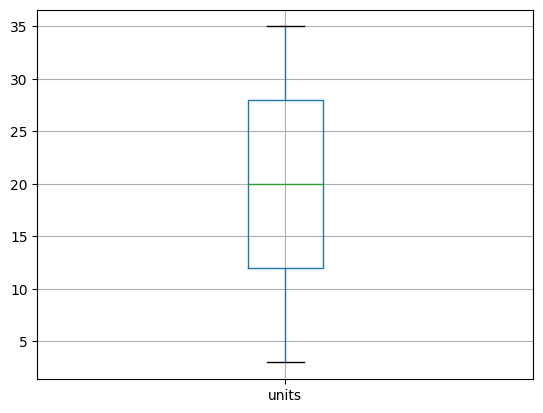

In [ ]:
df[["units"]].boxplot() # Crear un diagrama de caja (boxplot) de la columna 'units'
# Esto permite visualizar la mediana, cuartiles y posibles valores atípicos de las unidades vendidas
plt.show()


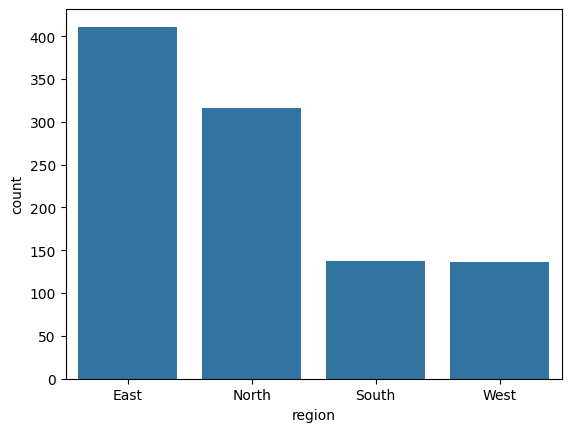

In [43]:
sns.countplot(data=df, x="region")# hace un conteo para region
plt.show()


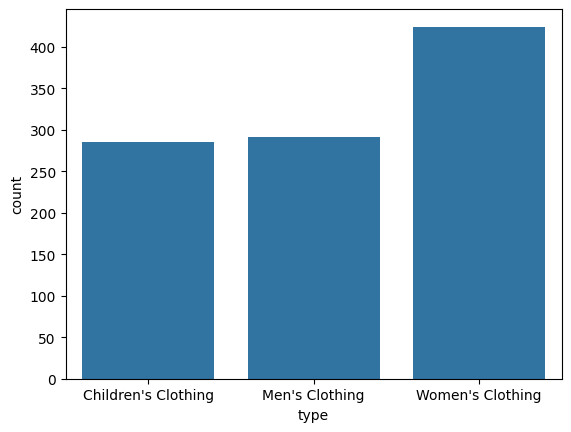

In [ ]:
sns.countplot(data=df, x="type") # Crear un gráfico de barras que muestre la cantidad de registros por cada categoría de la columna 'type'
plt.show()

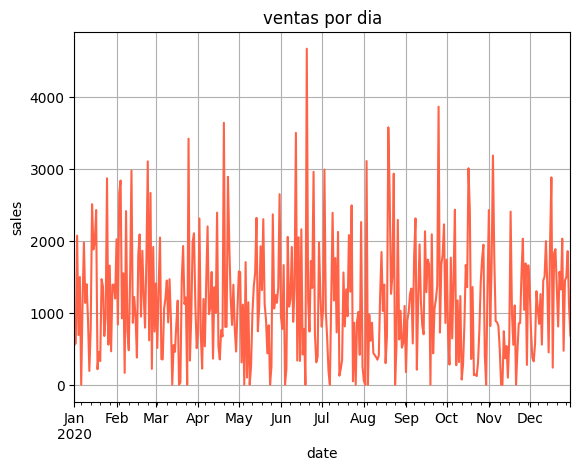

In [48]:
# grafica que incluye el eje del tiempo  despues de cambiar la columna date a indice
df["sales"].resample("D").sum().plot(title="ventas por dia", c="tomato")
plt.ylabel("sales")
plt.grid(True)
plt.show()

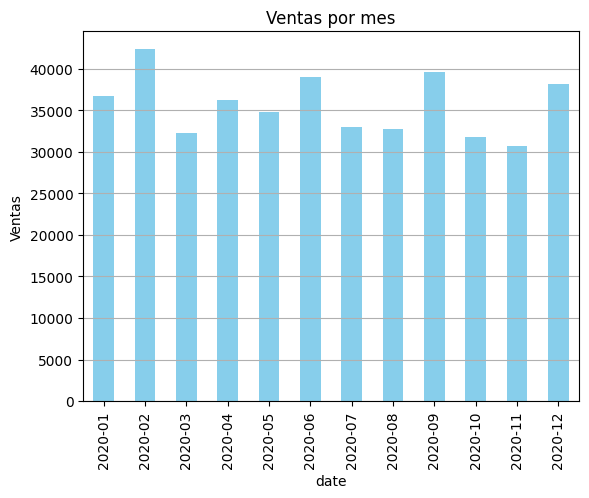

In [51]:
df["sales"].resample("ME").sum().plot(kind="bar", title="Ventas por mes", color="skyblue")
plt.gca().xaxis.set_ticklabels(df["sales"].resample("ME").sum().index.to_period("M"))
plt.ylabel("Ventas")
plt.grid(axis="y")
plt.show()

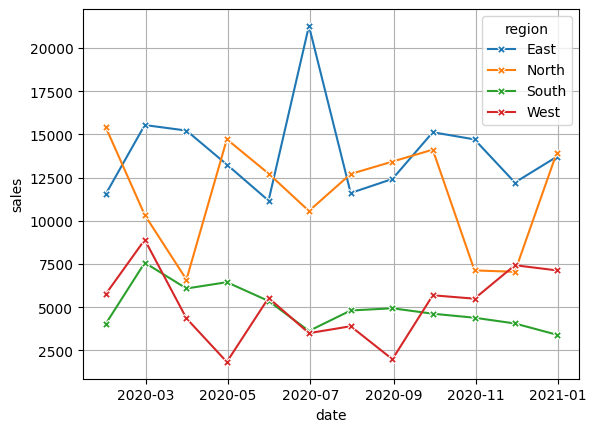

In [55]:
# grafica de lineas para hacer un desagregado
monthly = df.groupby("region", observed=False)["sales"].resample("ME").sum().reset_index()
sns.lineplot(data=monthly, x="date", y="sales", hue="region", marker="X")
plt.grid(True)
plt.show()
